<a href="https://colab.research.google.com/github/AhmedSaeed-ML/Supply-chain-Data-Analysis/blob/main/House_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House prediction

# Import Libraries

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import gaussian_kde

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler,RobustScaler,OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

import time
import itertools
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor


# Data Frame

In [58]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
file="/content/drive/MyDrive/Ahmed /kc_house_data.csv"
df=pd.read_csv(file)
df

id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  floors  waterfront  view  condition  ...  yr_built  \
0             1180     1.0           0     0          3  ...      1955   
1             2570     2.0           0     0          3  ...      1951   
2              770     1.0           0     0          3  ...      1933   
3             1960     1.0           0     0          5  ...      1965   
4             1680     1.0           0     0          3  ...      1987   
...            ...     ...         ...   ...        ...  ...       ...   
21608         1530     3.0           0     0          3  ...      2009   
21609         2310     2.0           0     0          3  ...      2014   
21610         1020     2.0           0     0          3  ...      2009   
21611         1600     2.0           0     0          3  ...      2004   
21612         1020     2.0           0     0          3  ...      2008   

       yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  \
0                 0    98178  47.5112 -122.257           1340        5650   
1              1991    98125  47.7210 -122.319           1690        7639   
2                 0    98028  47.7379 -122.233           2720        8062   
3                 0    98136  47.5208 -122.393           1360        5000   
4                 0    98074  47.6168 -122.045           1800        7503   
...             ...      ...      ...      ...            ...         ...   
21608             0    98103  47.6993 -122.346           1530        1509   
21609             0    98146  47.5107 -122.362           1830        7200   
21610             0    98144  47.5944 -122.299           1020        2007   
21611             0    98027  47.5345 -122.069           1410        1287   
21612             0    98144  47.5941 -122.299           1020        1357   

       sqft_lot  sqft_above  sqft_basement  
0          5650        1180              0  
1          7242        2170            400  
2         10000         770              0  
3          5000        1050            910  
4          8080        1680              0  
...         ...         ...            ...  
21608      1131        1530              0  
21609      5813        2310              0  
21610      1350        1020              0  
21611      2388        1600              0  
21612      1076        1020              0  

[21613 rows x 21 columns]

In [60]:
df.shape

(21613, 21)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  yr_built       21613 non-null  int64  
 12  yr_renovated   21613 non-null  int64  
 13  zipcode        21613 non-null  int64  
 14  lat            21613 non-null  float64
 15  long           21613 non-null  float64
 16  sqft_living15  21613 non-null  int64  
 17  sqft_lot15     21613 non-null  int64  
 18  sqft_l

In [62]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.401822e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.673622e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

             floors    waterfront          view     condition         grade  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       1.494309      0.007542      0.234303      3.409430      7.656873   
std        0.539989      0.086517      0.766318      0.650743      1.175459   
min        1.000000      0.000000      0.000000      1.000000      1.000000   
25%        1.000000      0.000000      0.000000      3.000000      7.000000   
50%        1.500000      0.000000      0.000000      3.000000      7.000000   
75%        2.000000      0.000000      0.000000      4.000000      8.000000   
max        3.500000      1.000000      4.000000      5.000000     13.000000   

           yr_built  yr_renovated       zipcode           lat          long  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean    1971.005136     84.402258  98077.939805     47.560053   -122.213896   
std       29.373411    401.679240     53.505026      0.138564      0.140828   
min     1900.000000      0.000000  98001.000000     47.155900   -122.519000   
25%     1951.000000      0.000000  98033.000000     47.471000   -122.328000   
50%     1975.000000      0.000000  98065.000000     47.571800   -122.230000   
75%     1997.000000      0.000000  98118.000000     47.678000   -122.125000   
max     2015.000000   2015.000000  98199.000000     47.777600   -121.315000   

       sqft_living15     sqft_lot15      sqft_lot    sqft_above  sqft_basement  
count   21613.000000   21613.000000  2.161300e+04  21613.000000   21613.000000  
mean     1986.552492   12768.455652  1.510697e+04   1788.390691     291.509045  
std       685.391304   27304.179631  4.142051e+04    828.090978     442.575043  
min       399.000000     651.000000  5.200000e+02    290.000000       0.000000  
25%      1490.000000    5100.000000  5.040000e+03   1190.000000       0.000000  
50%      1840.000000    7620.000000  7.618000e+03   1560.000000       0.000000  
75%      2360.000000   10083.000000  1.068800e+04   2210.000000     560.000000  
max      6210.000000  871200.000000  1.651359e+06   9410.000000    4820.000000

#  Data Quality

## Completeness

In [63]:
# Checking missing values
missing_values = df.isnull().sum()

if missing_values.sum() == 0:
    print("There are no missing values ​​in all columns.")
else:
    columns_with_missing = missing_values[missing_values > 0]
    for column, count in columns_with_missing.items():
        total = len(df)
        percentage = (count / total) * 100
        print(f"Column '{column}' has {count} missing values out of {total} ({percentage:.2f}%)")

There are no missing values ​​in all columns.


## Uniqueness

In [64]:
# Handle duplicates
duplicates=df[df.duplicated()]
print (duplicates.shape)
df[df.duplicated()]

(0, 21)


Empty DataFrame
Columns: [id, date, price, bedrooms, bathrooms, sqft_living, floors, waterfront, view, condition, grade, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15, sqft_lot, sqft_above, sqft_basement]
Index: []

[0 rows x 21 columns]

## Consistency

In [65]:
df.drop(columns=["id","date"],inplace=True)

In [66]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront',
       'view', 'condition', 'grade', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'sqft_lot', 'sqft_above',
       'sqft_basement'],
      dtype='object')

In [67]:
# caregorical Data encoded
encoded_col= ['waterfront','view', 'condition', 'grade']
df[encoded_col]=df[encoded_col].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   floors         21613 non-null  float64
 5   waterfront     21613 non-null  object 
 6   view           21613 non-null  object 
 7   condition      21613 non-null  object 
 8   grade          21613 non-null  object 
 9   yr_built       21613 non-null  int64  
 10  yr_renovated   21613 non-null  int64  
 11  zipcode        21613 non-null  int64  
 12  lat            21613 non-null  float64
 13  long           21613 non-null  float64
 14  sqft_living15  21613 non-null  int64  
 15  sqft_lot15     21613 non-null  int64  
 16  sqft_lot       21613 non-null  int64  
 17  sqft_above     21613 non-null  int64  
 18  sqft_b

## Check Validity

In [68]:
for i in df.select_dtypes("number").columns:
  print("{}, {} -> {}".format(i,df[i].min(),df[i].max()))
  print("-"*50)

price, 75000.0 -> 7700000.0
--------------------------------------------------
bedrooms, 0 -> 33
--------------------------------------------------
bathrooms, 0.0 -> 8.0
--------------------------------------------------
sqft_living, 290 -> 13540
--------------------------------------------------
floors, 1.0 -> 3.5
--------------------------------------------------
yr_built, 1900 -> 2015
--------------------------------------------------
yr_renovated, 0 -> 2015
--------------------------------------------------
zipcode, 98001 -> 98199
--------------------------------------------------
lat, 47.1559 -> 47.7776
--------------------------------------------------
long, -122.519 -> -121.315
--------------------------------------------------
sqft_living15, 399 -> 6210
--------------------------------------------------
sqft_lot15, 651 -> 871200
--------------------------------------------------
sqft_lot, 520 -> 1651359
--------------------------------------------------
sqft_above, 290 -> 9410


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   floors         21613 non-null  float64
 5   waterfront     21613 non-null  object 
 6   view           21613 non-null  object 
 7   condition      21613 non-null  object 
 8   grade          21613 non-null  object 
 9   yr_built       21613 non-null  int64  
 10  yr_renovated   21613 non-null  int64  
 11  zipcode        21613 non-null  int64  
 12  lat            21613 non-null  float64
 13  long           21613 non-null  float64
 14  sqft_living15  21613 non-null  int64  
 15  sqft_lot15     21613 non-null  int64  
 16  sqft_lot       21613 non-null  int64  
 17  sqft_above     21613 non-null  int64  
 18  sqft_b

In [70]:
for i in df.columns:
  unique_values = df[i].nunique()
  missing_values = df[i].isnull().sum()
  if unique_values == 1 and missing_values == 0:
    print (i)
    df.drop(i, axis=1, inplace=True)


#Data Exploration

## Univariate Analysis

In [71]:
for i in df.select_dtypes("object").columns:
  print (df[i].value_counts())
  print  ("-"*50)

waterfront
0    21450
1      163
Name: count, dtype: int64
--------------------------------------------------
view
0    19489
2      963
3      510
1      332
4      319
Name: count, dtype: int64
--------------------------------------------------
condition
3    14031
4     5679
5     1701
2      172
1       30
Name: count, dtype: int64
--------------------------------------------------
grade
7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: count, dtype: int64
--------------------------------------------------


In [72]:
#Display Numerical data
for col in df.select_dtypes("number").columns:
    fig = px.histogram(df, x=col, histnorm='probability density', opacity=0.5)
    kde = gaussian_kde(df[col])
    x_values = np.linspace(df[col].min(), df[col].max(), 100)
    kde_values = kde(x_values)
    fig.add_trace(go.Scatter(x=x_values, y=kde_values, mode='lines', name='KDE', line=dict(color='red')))
    fig.show()

In [73]:
# Display Outliers
for i in df.select_dtypes(include='number').columns:
  fig = px.box(df, y=i)
  print(i)
  fig.show()

price


bedrooms


bathrooms


sqft_living


floors


yr_built


yr_renovated


zipcode


lat


long


sqft_living15


sqft_lot15


sqft_lot


sqft_above


sqft_basement


## Bivariate Analysis

<Axes: >

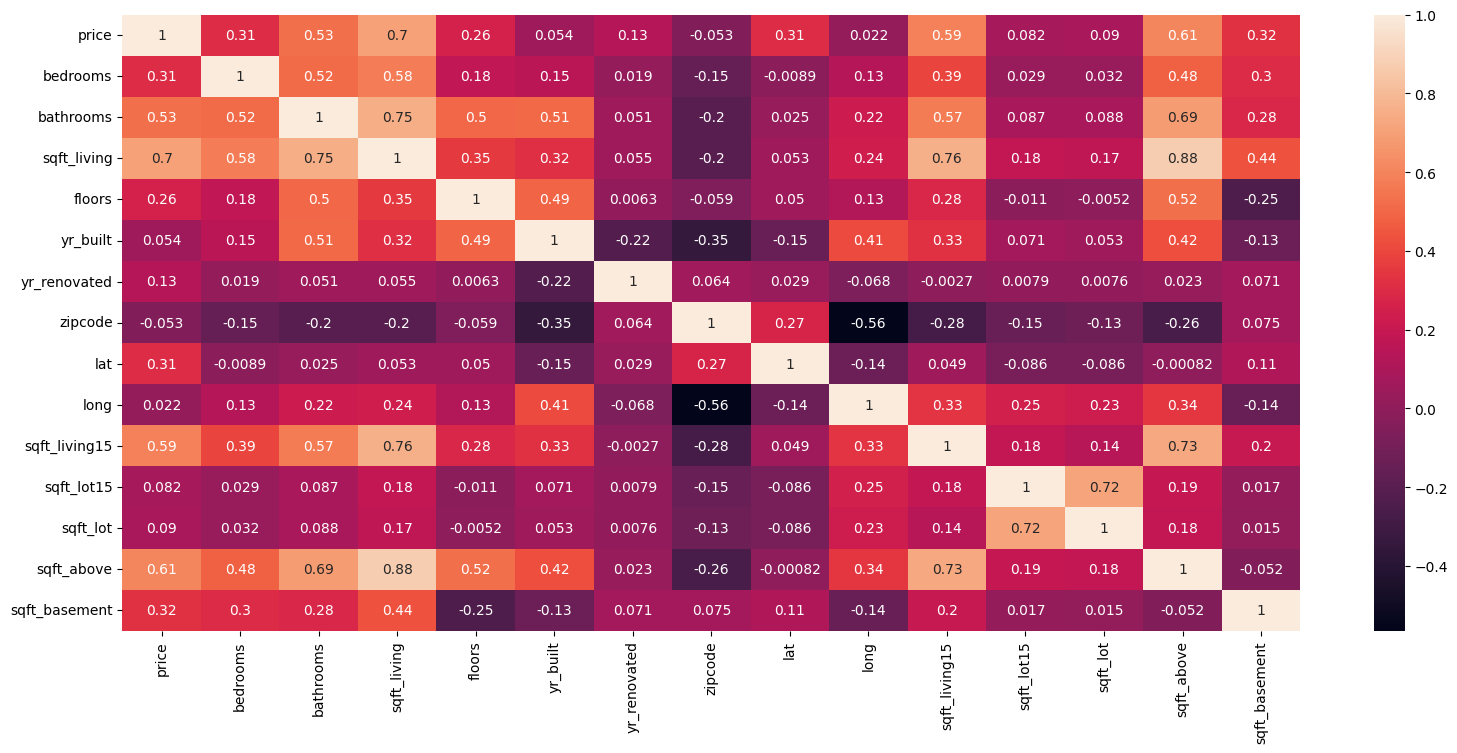

In [74]:
plt.figure(figsize=(19,8))
sns.heatmap(df.select_dtypes("number").corr(), annot=True)

## Multivariate Analysis

In [75]:
px.scatter(data_frame=df,x="sqft_living",y = "price",color='waterfront' ,trendline="ols",hover_name="bedrooms")

# Importance features

In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [ 70,80,90,100 ],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rfc=RandomForestRegressor(random_state=0)
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='r2')

# Fit the model
grid_search.fit(X_train_FI, Y_train_FI)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best R^2 Score:", grid_search.best_score_)

# Make predictions with the best model
best_model = grid_search.best_estimator_
Y_pred_FI = best_model.predict(X_temp_FI)

# Calculate R^2 score on validation set
print("Validation R^2 Score:", r2_score(Y_temp_FI, Y_pred_FI))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Parameters: {'min_samples_split': 2, 'n_estimators': 90}
Best R^2 Score: 0.8660091567240883
Validation R^2 Score: 0.8789881303126708


R2_testing 0.8831422587898676
R2_training 0.9796308061722275


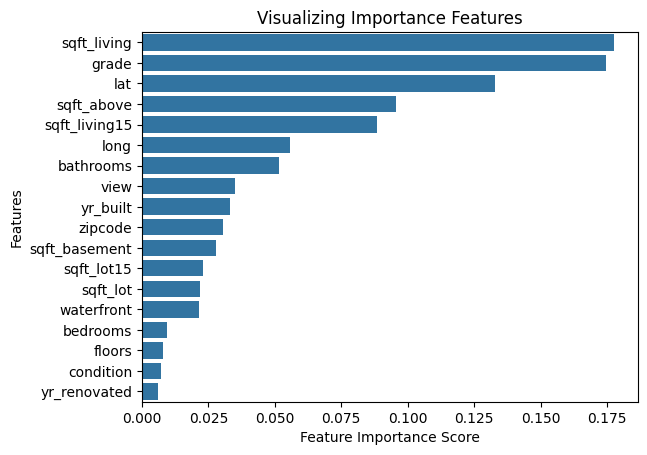

sqft_living      0.177699
grade            0.174450
lat              0.133014
sqft_above       0.095471
sqft_living15    0.088551
long             0.055571
bathrooms        0.051641
view             0.034908
yr_built         0.033302
zipcode          0.030553
sqft_basement    0.027856
sqft_lot15       0.022915
sqft_lot         0.021885
waterfront       0.021499
bedrooms         0.009607
floors           0.008034
condition        0.007169
yr_renovated     0.005873
dtype: float64


In [77]:
X_FI= df.drop(["price"],axis=1)
Y_FI=df["price"]
X_train_FI, X_temp_FI, Y_train_FI, Y_temp_FI = train_test_split(X_FI, Y_FI, test_size=0.3, random_state=101,shuffle=True)
n=80
max_features='sqrt'
rfg=RandomForestRegressor(n_estimators=n,random_state=0, max_features=max_features)
rfg.fit(X_train_FI,Y_train_FI)
Y_pred_FI=rfg.predict(X_temp_FI)
print("R2_testing",r2_score(Y_temp_FI, Y_pred_FI))

Y_pred_FI2=rfg.predict(X_train_FI)
print("R2_training",r2_score(Y_train_FI, Y_pred_FI2))

feature_scores = pd.Series(rfg.feature_importances_, index= pd.DataFrame(X_train_FI, columns=X_FI.columns).columns).sort_values(ascending=False)


# creating visulization
sns.barplot(x=feature_scores, y = feature_scores.index )
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Importance Features")
plt.show()
# Display feature importances
print(feature_scores)

# Data preprocessing

## Split Data

In [78]:
x= df.drop(["price"],axis=1)
y=df["price"]

In [79]:
x_train, x_Temp, y_train, y_Temp = train_test_split(x, y, test_size=0.3, random_state=101,shuffle=True)
x_val, x_test, y_val, y_test = train_test_split(x_Temp, y_Temp, test_size=0.5, random_state=101,shuffle=True)

In [80]:
print('Shape of training data :',x_train.shape)
print('Shape of valid data :',x_val.shape)
print('Shape of testing data :',x_test.shape)
print('Shape of training data :',y_train.shape)
print('Shape of valid data :',y_val.shape)
print('Shape of testing data :',y_test.shape)


Shape of training data : (15129, 18)
Shape of valid data : (3242, 18)
Shape of testing data : (3242, 18)
Shape of training data : (15129,)
Shape of valid data : (3242,)
Shape of testing data : (3242,)


In [81]:
preprocessor= ColumnTransformer([
        ("num", RobustScaler(),df.select_dtypes("number").columns.drop(["price"])),
        ("cat",OrdinalEncoder(),df.select_dtypes("object").columns)])

In [82]:
x_train=preprocessor.fit_transform(x_train)
x_val=preprocessor.transform(x_val)
x_test=preprocessor.transform(x_test)

# Models test

In [83]:
def eval_model_r2(model,x_train,y_train,x_val,y_val):
  model.fit(x_train,y_train)
  train_pred = model.predict(x_train)
  val_pred = model.predict(x_val)
  train_r2 = r2_score(y_train,train_pred)
  val_r2 = r2_score(y_val,val_pred)
  return train_r2 , val_r2 , val_pred

In [84]:
def eval_model_MAE (model,x_train,y_train,x_val,y_val):
  model.fit(x_train,y_train)
  train_pred = model.predict(x_train)
  val_pred = model.predict(x_val)
  train_mae = mean_absolute_error(y_train,train_pred)
  val_mae = mean_absolute_error(y_val,val_pred)
  return train_mae , val_mae , val_pred

In [85]:
models = [KNeighborsRegressor(), LinearRegression(), Ridge(), Lasso(), ElasticNet(),SVR(),
          DecisionTreeRegressor(), RandomForestRegressor(),AdaBoostRegressor(),
          GradientBoostingRegressor(n_estimators=  200),XGBRegressor() ]


In [86]:
models_names =["KNN", "LinearRegression","Ridge", "Lasso", "ElasticNet","SVR", "DecisionTree", "RandomForest" , "AdaBoost","GBoosting","XGBRegressor" ]



# Models Evaluation

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.554e+14, tolerance: 2.006e+11



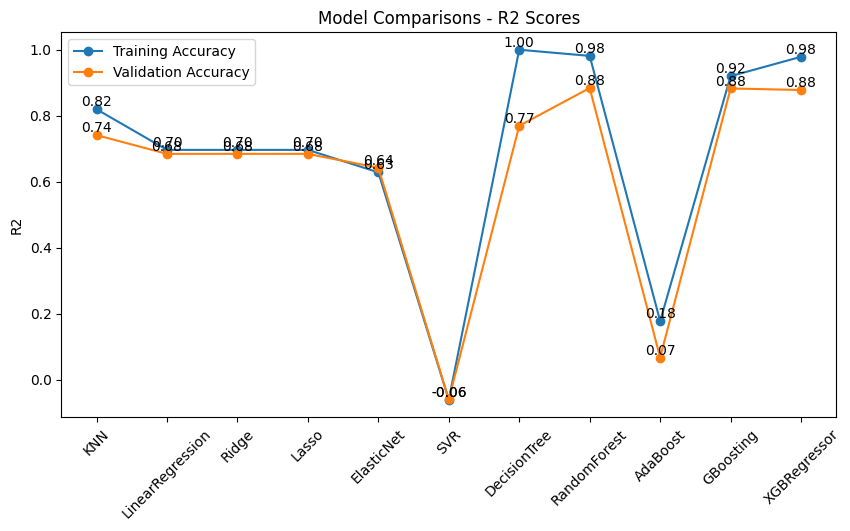

In [87]:
# create list for R2 results

train_result_r2=[]
val_result_r2=[]


# train models and get R2 results

for model in models :
  train_r2, val_r2, y_pred =eval_model_r2(model,x_train, y_train,x_val,y_val)
  train_result_r2.append(train_r2)
  val_result_r2.append(val_r2)
  r2=r2_score(y_val,y_pred)


# Create Visual

plt.figure(figsize=(10,5))
plt.plot(models_names,train_result_r2,"o-",label="Training Accuracy")
plt.plot(models_names,val_result_r2,"o-",label="Validation Accuracy")
plt.ylabel("R2")
plt.xticks(rotation=45)
plt.legend()
plt.title("Model Comparisons - R2 Scores")


# Add value annotations for training results
for i, value in enumerate(train_result_r2):
    plt.text(i, value, f"{value:.2f}", ha='center', va='bottom')

# Add value annotations for validation results
for i, value in enumerate(val_result_r2):
    plt.text(i, value, f"{value:.2f}", ha='center', va='bottom')
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.554e+14, tolerance: 2.006e+11



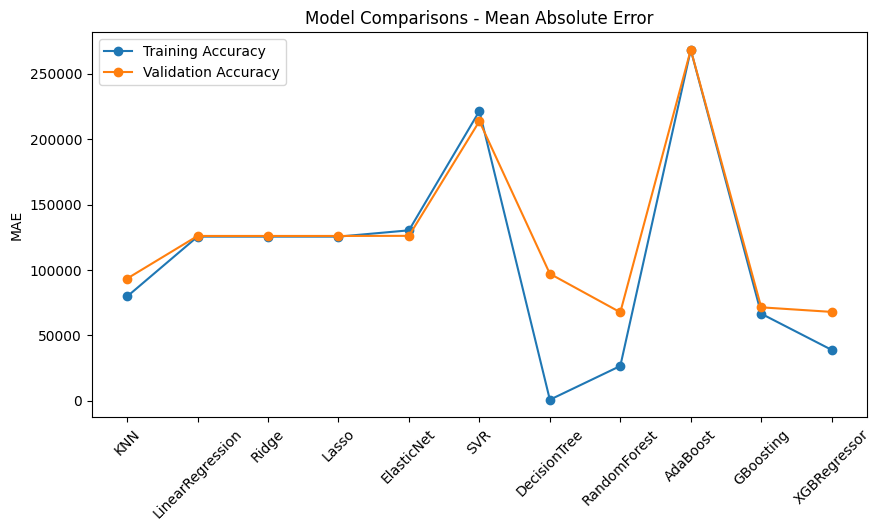

In [88]:
# create list for MAE results

train_result_mae=[]
val_result_mae=[]

# train models and get MAE results

for model in models :
  train_mae, val_mae, y_pred =eval_model_MAE(model,x_train, y_train,x_val,y_val)
  train_result_mae.append(train_mae)
  val_result_mae.append(val_mae)
  r2=r2_score(y_val,y_pred)

# Create Visual

plt.figure(figsize=(10,5))
plt.plot(models_names,train_result_mae,"o-",label="Training Accuracy")
plt.plot(models_names,val_result_mae,"o-",label="Validation Accuracy")
plt.ylabel("MAE")
plt.xticks(rotation=45)
plt.legend()
plt.title("Model Comparisons - Mean Absolute Error")
plt.show()

# The Best Model is GBOOST


In [89]:
# Train GBOOST
n_estimators=  200
learning_rate=0.1
GBoost_model=GradientBoostingRegressor(n_estimators= n_estimators, learning_rate=learning_rate)
start = time.time()

GBoost_model.fit(x_train, y_train)

end = time.time()


print(f'Training GBOOST took {round(end-start,2)} seconds to be completed!')

Training GBOOST took 9.89 seconds to be completed!


In [90]:
# predict the target on train data
GBoost_predict_train = GBoost_model.predict(x_train)

# R2 and MAE Score on train data
R2_train = r2_score(y_train,GBoost_predict_train)
MAE_train = mean_absolute_error(y_train,GBoost_predict_train)

# predict the target on val data
GBoost_predict_val = GBoost_model.predict(x_val)

# R2 and MAE Score on val data
R2_val = r2_score(y_val,GBoost_predict_val)
MAE_val = mean_absolute_error(y_val,GBoost_predict_val)


print('\nR2_score on train data GBoost : ', R2_train, ",MAE" , MAE_train )

print('\nR2_score on val data GBoost : ', R2_val, ",MAE", MAE_val)


R2_score on train data GBoost :  0.9192800663842312 ,MAE 66587.898678701

R2_score on val data GBoost :  0.8813229620588168 ,MAE 71509.30783607806


In [91]:
# predict the target on the test data
GBoost_predict_test = GBoost_model.predict(x_test)

# Accuracy Score on test data
R2_test = r2_score(y_test,GBoost_predict_test)
MAE_test = mean_absolute_error(y_test,GBoost_predict_test)
print('R2_score on test dataset : ', R2_test, ",MAE", MAE_test)

R2_score on test dataset :  0.8806600666279155 ,MAE 75244.30960644815


In [ ]:
# Create a GradientBoostingRegressor instance
gbr = GradientBoostingRegressor()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [150, 200, 250,300],
    'learning_rate': [0.1, 0.2],
    'max_depth': [3, 4, 5],
    #'min_samples_split': [2, 5, 10],
    #'min_samples_leaf': [1, 2, 4]
}

# Set up the grid search
grid_search = GridSearchCV(estimator=gbr,
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=5,
                           verbose=1,
                           n_jobs=-1)

# Fit the grid search
grid_search.fit(x_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)



Fitting 5 folds for each of 24 candidates, totalling 120 fits
